In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from gwbird import detectors
from gwbird import pls
from gwbird import overlap 
from gwbird import nell 
from gwbird import skymap

from gwbird.skymap import Skymaps
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

from astropy.cosmology import Planck15
cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

c = 299792458 #m/s

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'



# Example notebook for ET $\Delta$

* Response (Overlap Reduction function)

In [2]:
f = np.logspace(np.log10(1), np.log10(100000), 1000)

print('Calculating Overlaps ET triangular')
print('- tensor modes')
R_t = Response.overlap('ET X', 'ET Y', f, 0, 't', None)
print('- vector modes')
R_v = Response.overlap('ET X', 'ET Y', f, 0, 'v', None)
print('- scalar modes')
R_s = Response.overlap('ET X', 'ET Y', f, 0, 's', None)
print('- V')
R_V = Response.overlap('ET X', 'ET Y', f, 0, 'V', None)

Calculating Overlaps ET triangular
- tensor modes
- vector modes
- scalar modes
- V


Text(0.5, 1.0, 'ET $\\Delta$ response')

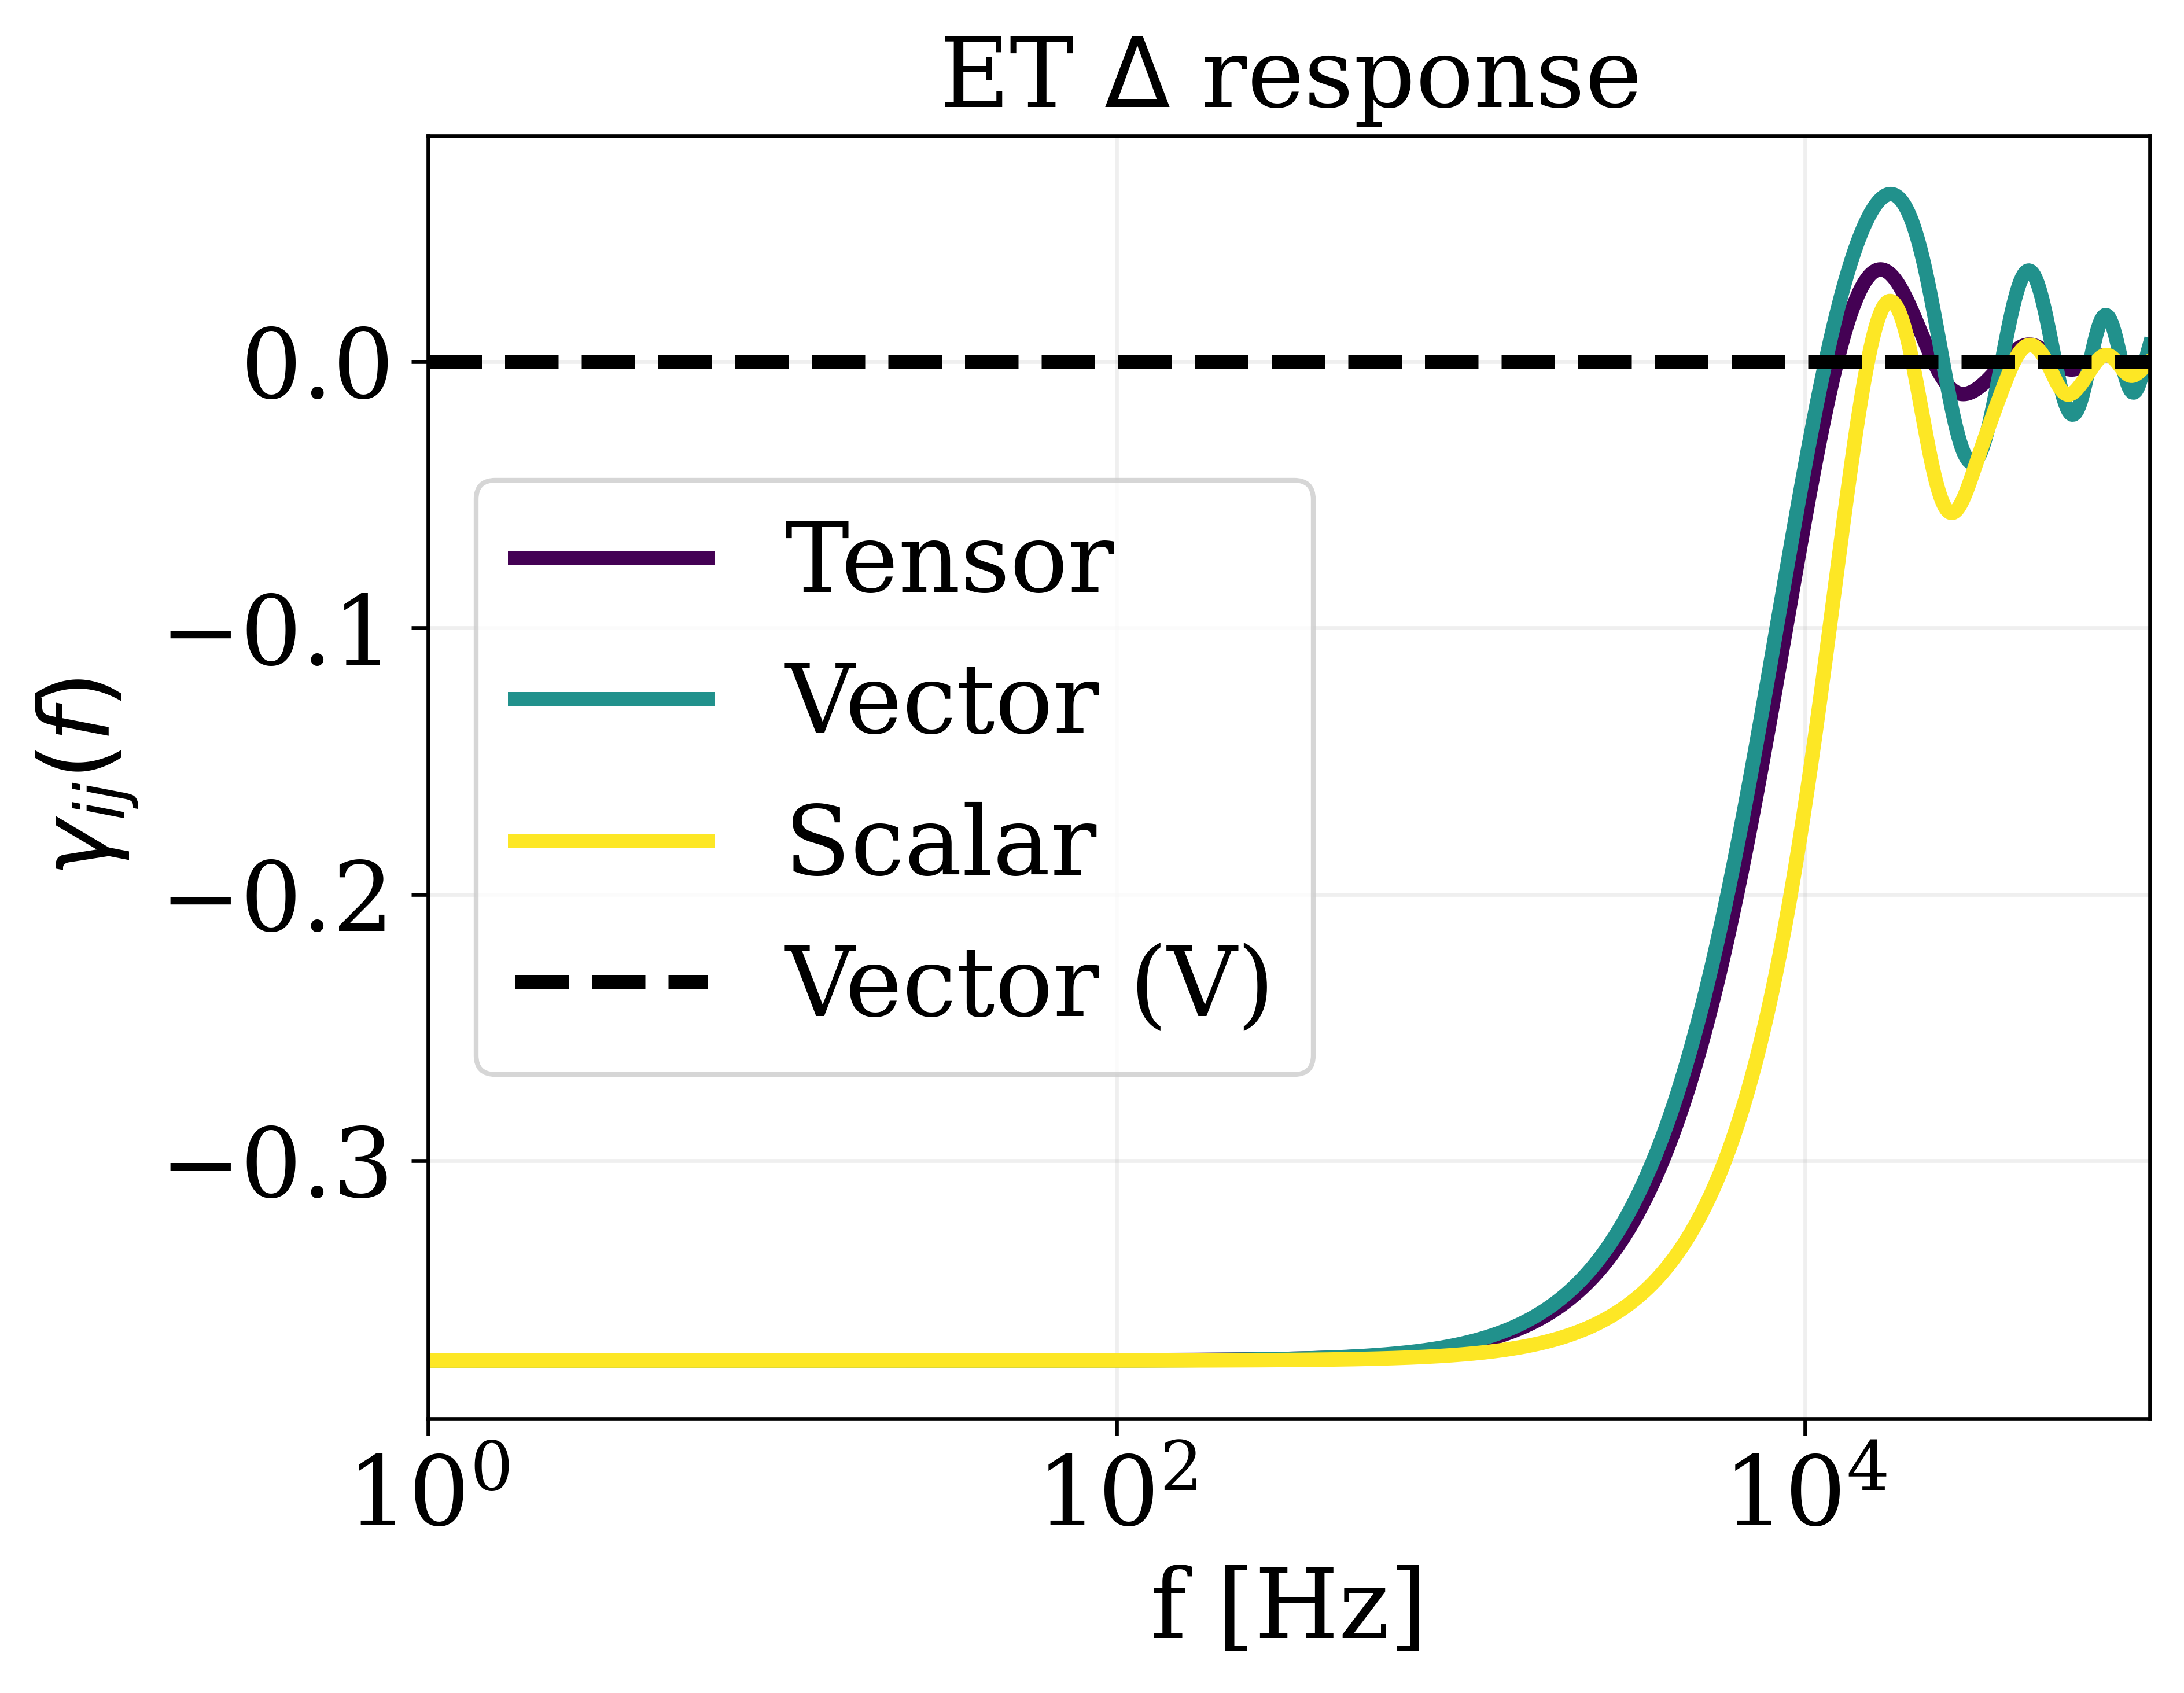

In [3]:
colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s, label='Scalar', color = colors[2], rasterized=True)
plt.plot(f, R_V, label='Vector (V)', color = 'k', linestyle='--', rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}(f)$')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 1e5)
plt.legend()
plt.title(r'ET $\Delta$ response')

* Power Law Integrated Sensitivity Curve

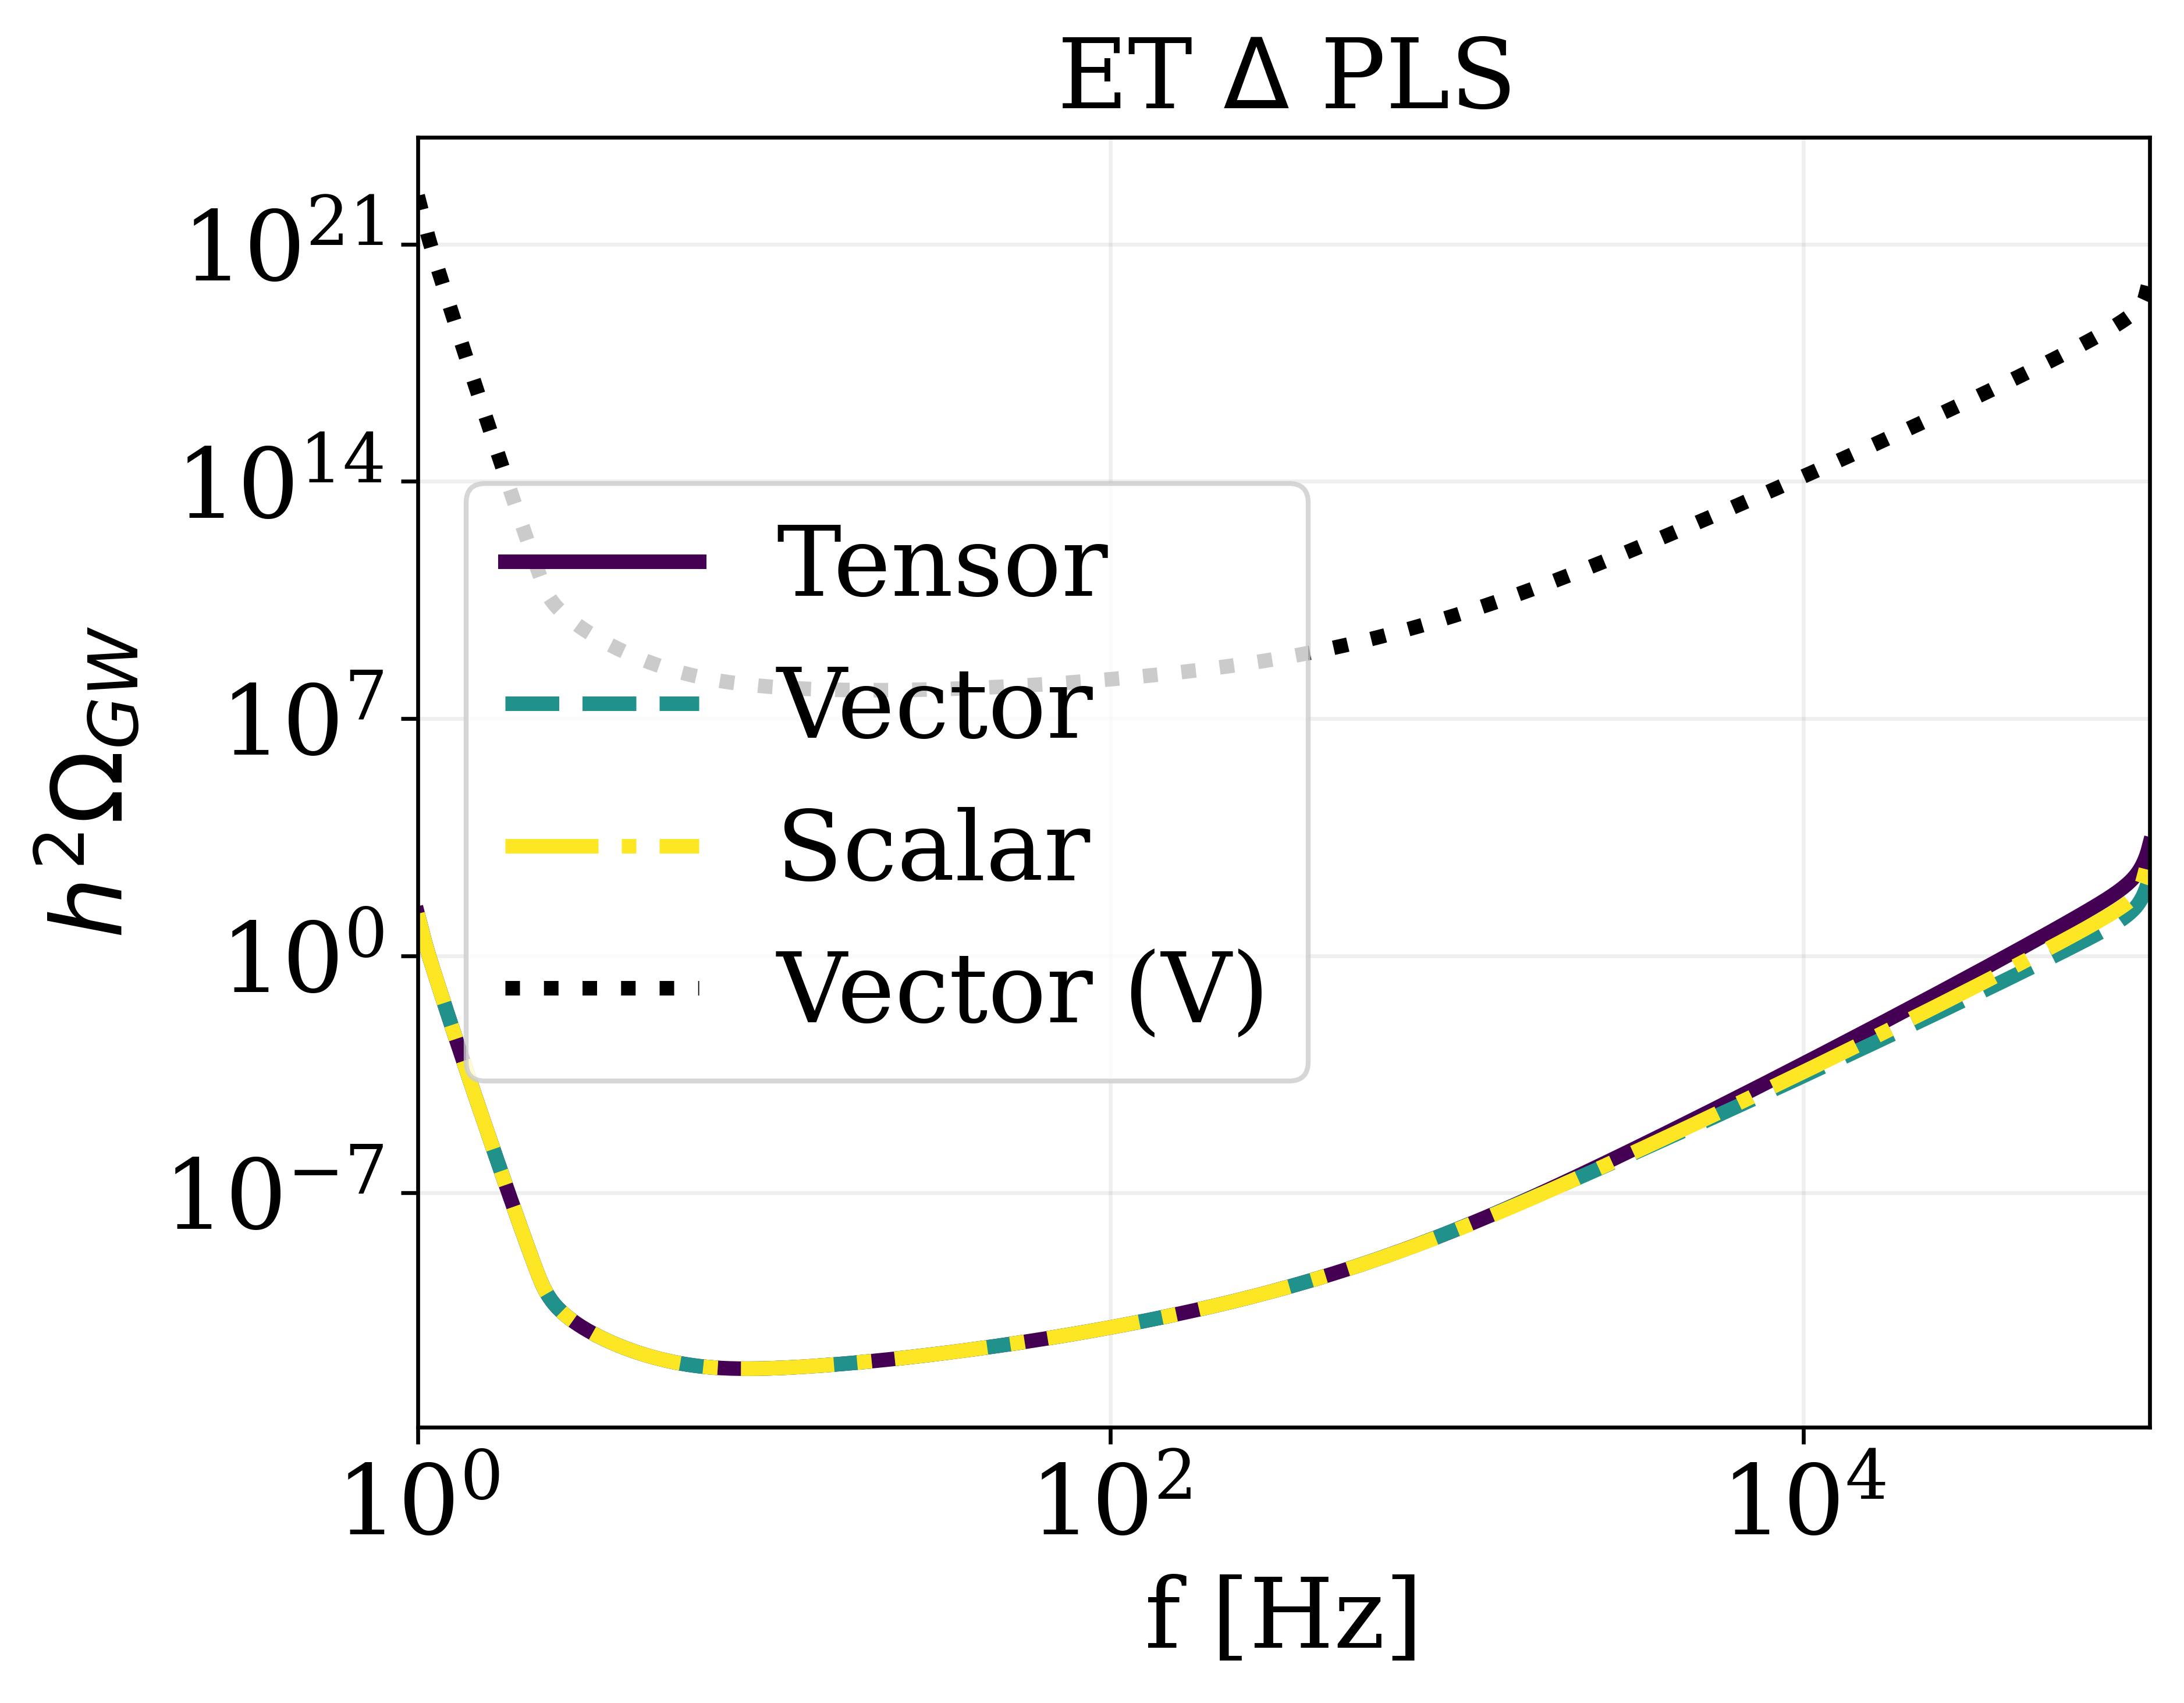

In [4]:
f = np.logspace(0, np.log10(100000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_t = pls.PLS('ET X', 'ET Y', f, fref, 't', snr, Tobs, 0, None)
pls_v = pls.PLS('ET X', 'ET Y', f, fref, 'v', snr, Tobs, 0, None)
pls_s = pls.PLS('ET X', 'ET Y', f, fref, 's', snr, Tobs, 0, None)
pls_V = pls.PLS('ET X', 'ET Y', f, fref, 'V', snr, Tobs, 0, None)

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.plot(f, pls_V, label='Vector (V)', color='k', linestyle=':', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET $\Delta$ PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 1e5)
plt.legend()

In [6]:
print(np.min(pls_t))
print(np.min(pls_v))
print(np.min(pls_s))

6.540149557420437e-13
6.538779304675459e-13
6.538768130830408e-13


* Angular Response

In [5]:
f = np.logspace(0, np.log10(100000), 1000)

print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R0_v = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R0_s = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R0_V = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R1_v = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R1_s = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R1_V = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R2_v = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R2_s = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R2_V = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R3_v = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R3_s = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R3_V = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes
- V


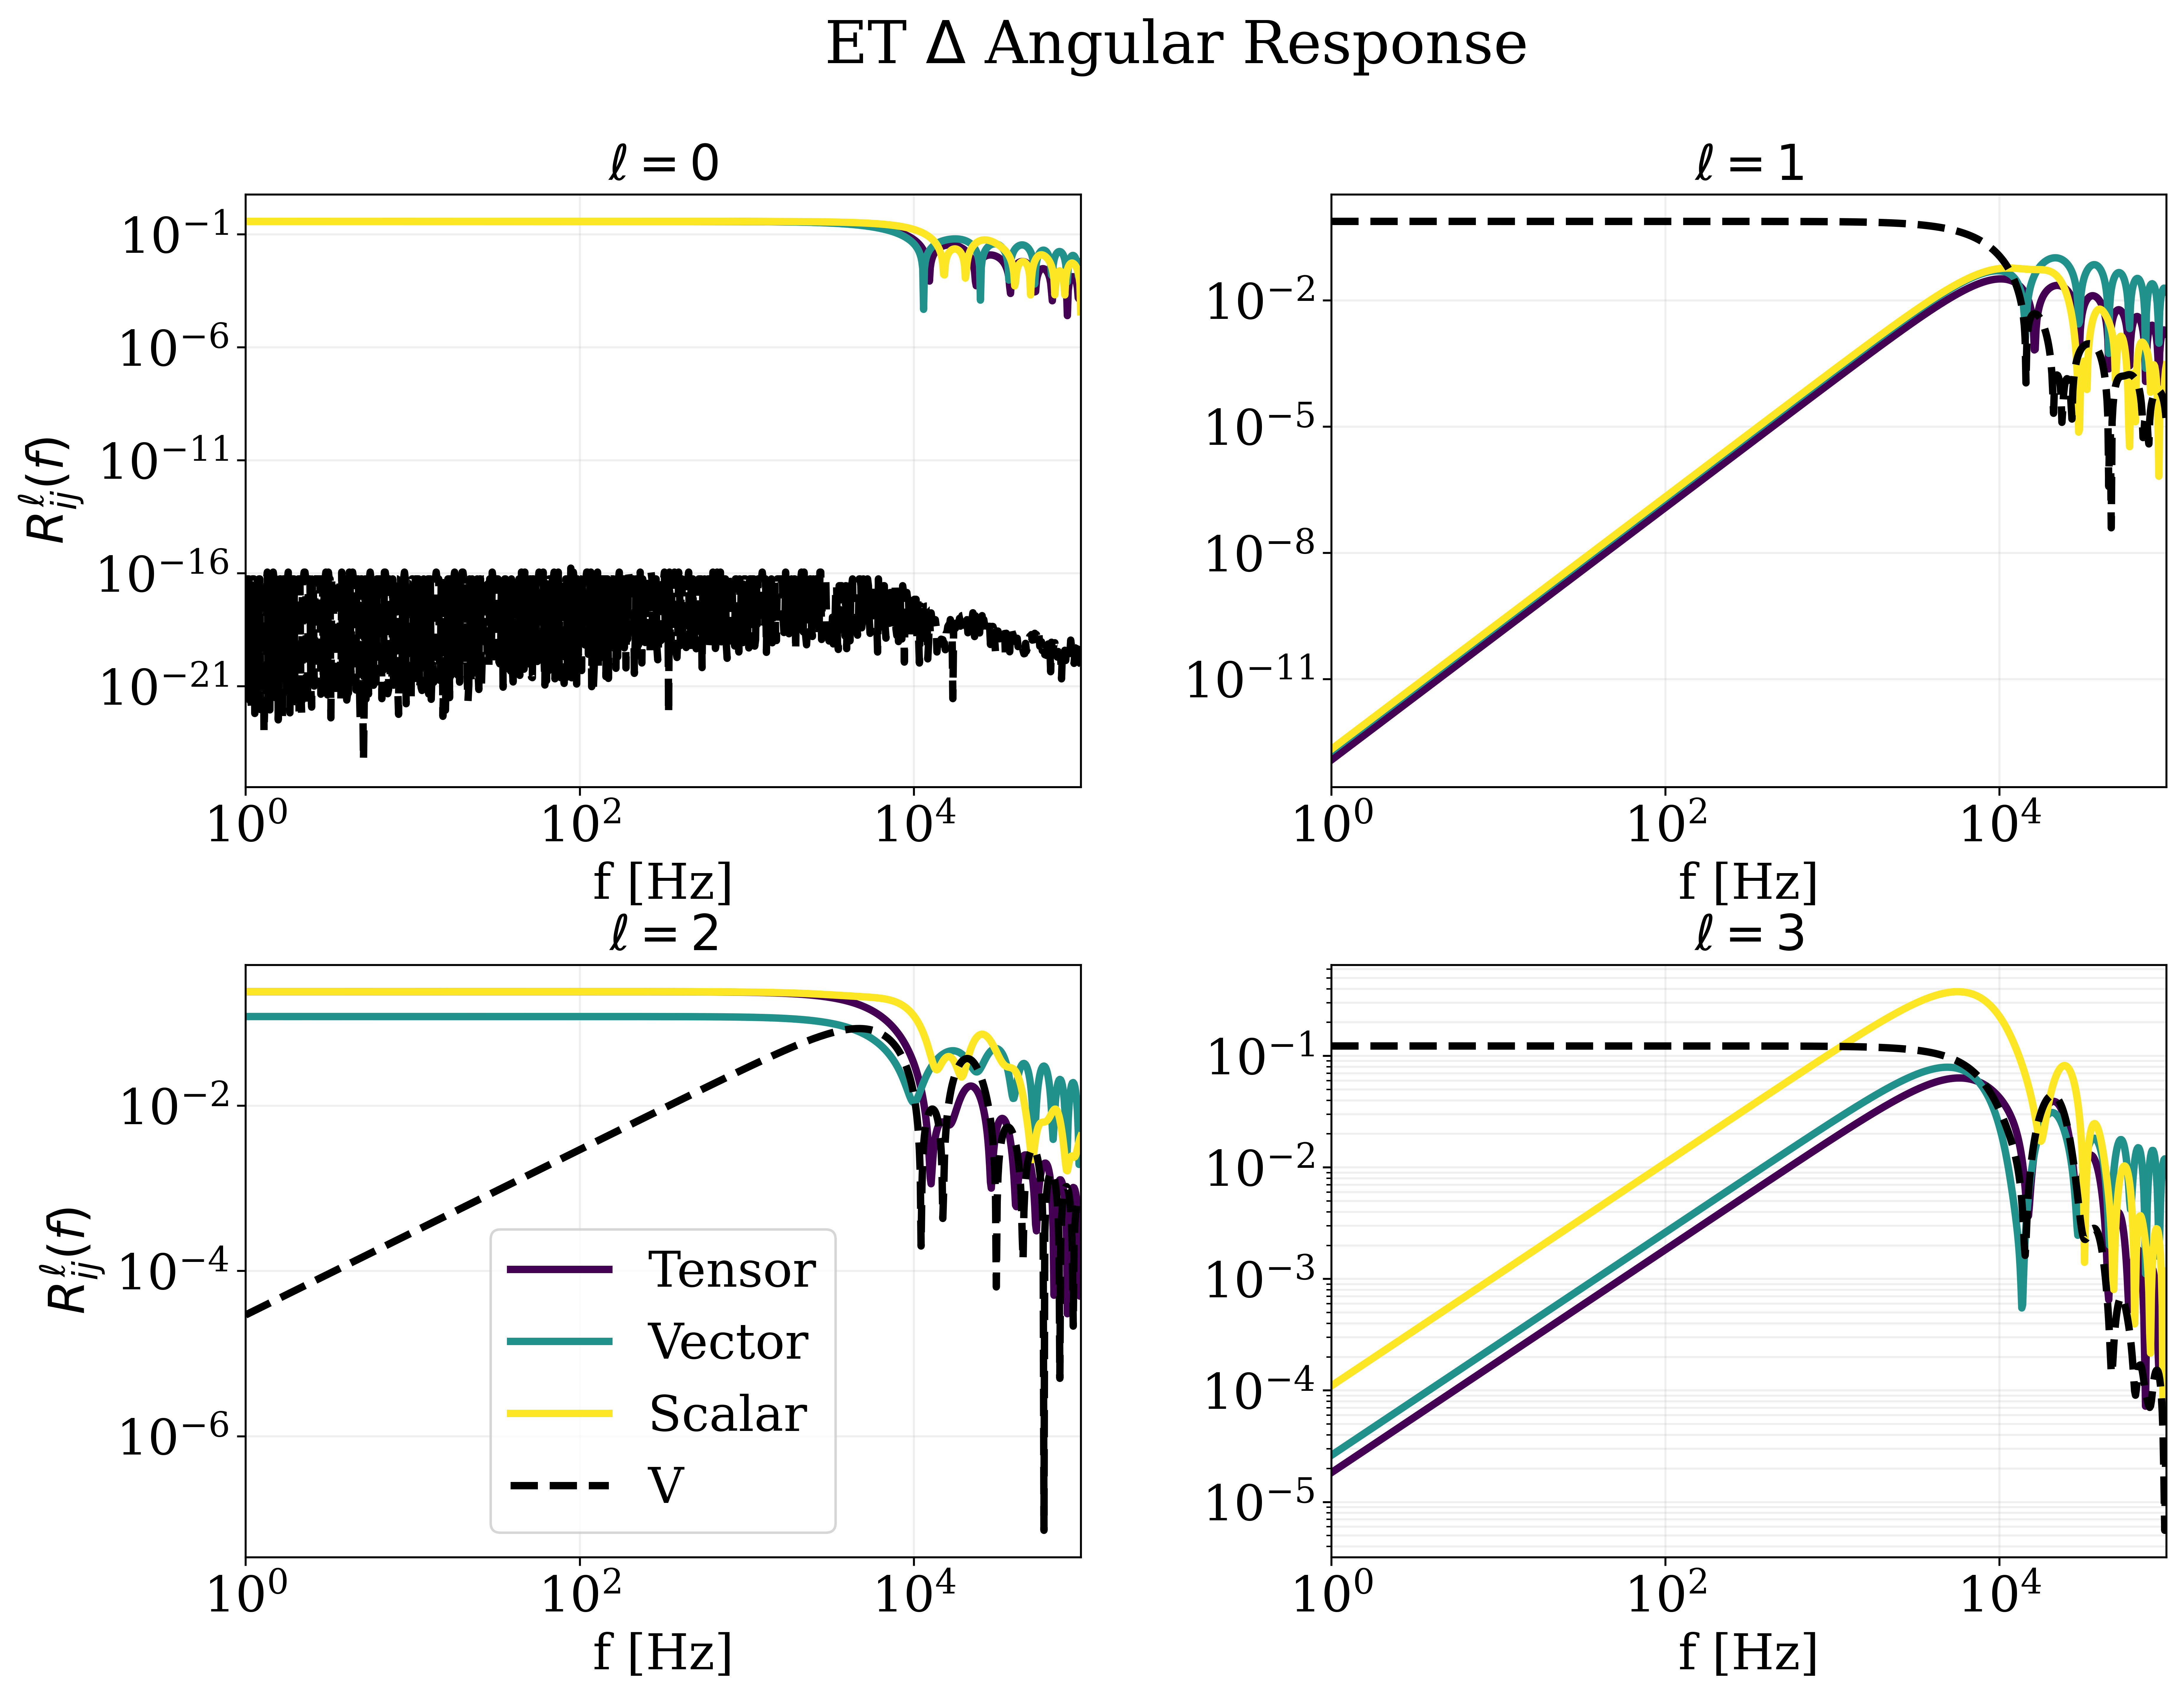

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})


# monopole
axs[0, 0].plot(f, R0_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].plot(f, R0_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}^{\ell}(f)$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_xlim(1, 1e5)
axs[0, 0].set_title(r'$\ell = 0$')

# dipole
axs[0, 1].plot(f, R1_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].plot(f, R1_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].grid(alpha=0.2, which='both')
axs[0, 1].set_xlim(1, 1e5)
axs[0, 1].set_title(r'$\ell = 1$')

# quadrupole
axs[1, 0].plot(f, R2_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].plot(f, R2_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}^{\ell}(f)$')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_xlim(1, 1e5)
axs[1, 0].set_title(r'$\ell = 2$')

# octupole
axs[1, 1].plot(f, R3_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].plot(f, R3_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
#axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_xlim(1, 1e5)
axs[1, 1].set_title(r'$\ell = 3$')

# Imposta il titolo principale
fig.suptitle(r'ET $\Delta$ Angular Response')

plt.show()

* Sensitivity curver for the multipoles


In [11]:
pls0_t = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 0, f, 't', 0, fref, snr, Tobs, 1)
pls1_t = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 1, f, 't', 0, fref, snr, Tobs,  1e-3)
pls2_t = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 2, f, 't', 0, fref, snr, Tobs,  1e-3)
pls3_t = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 3, f, 't', 0, fref, snr, Tobs,  1e-3)


print(np.min(pls0_t))
print(np.min(pls1_t))
print(np.min(pls2_t))
print(np.min(pls3_t))

6.540149557420437e-13
0.00048255217941585557
3.238909119417816e-11
3.4546040022279154e-08


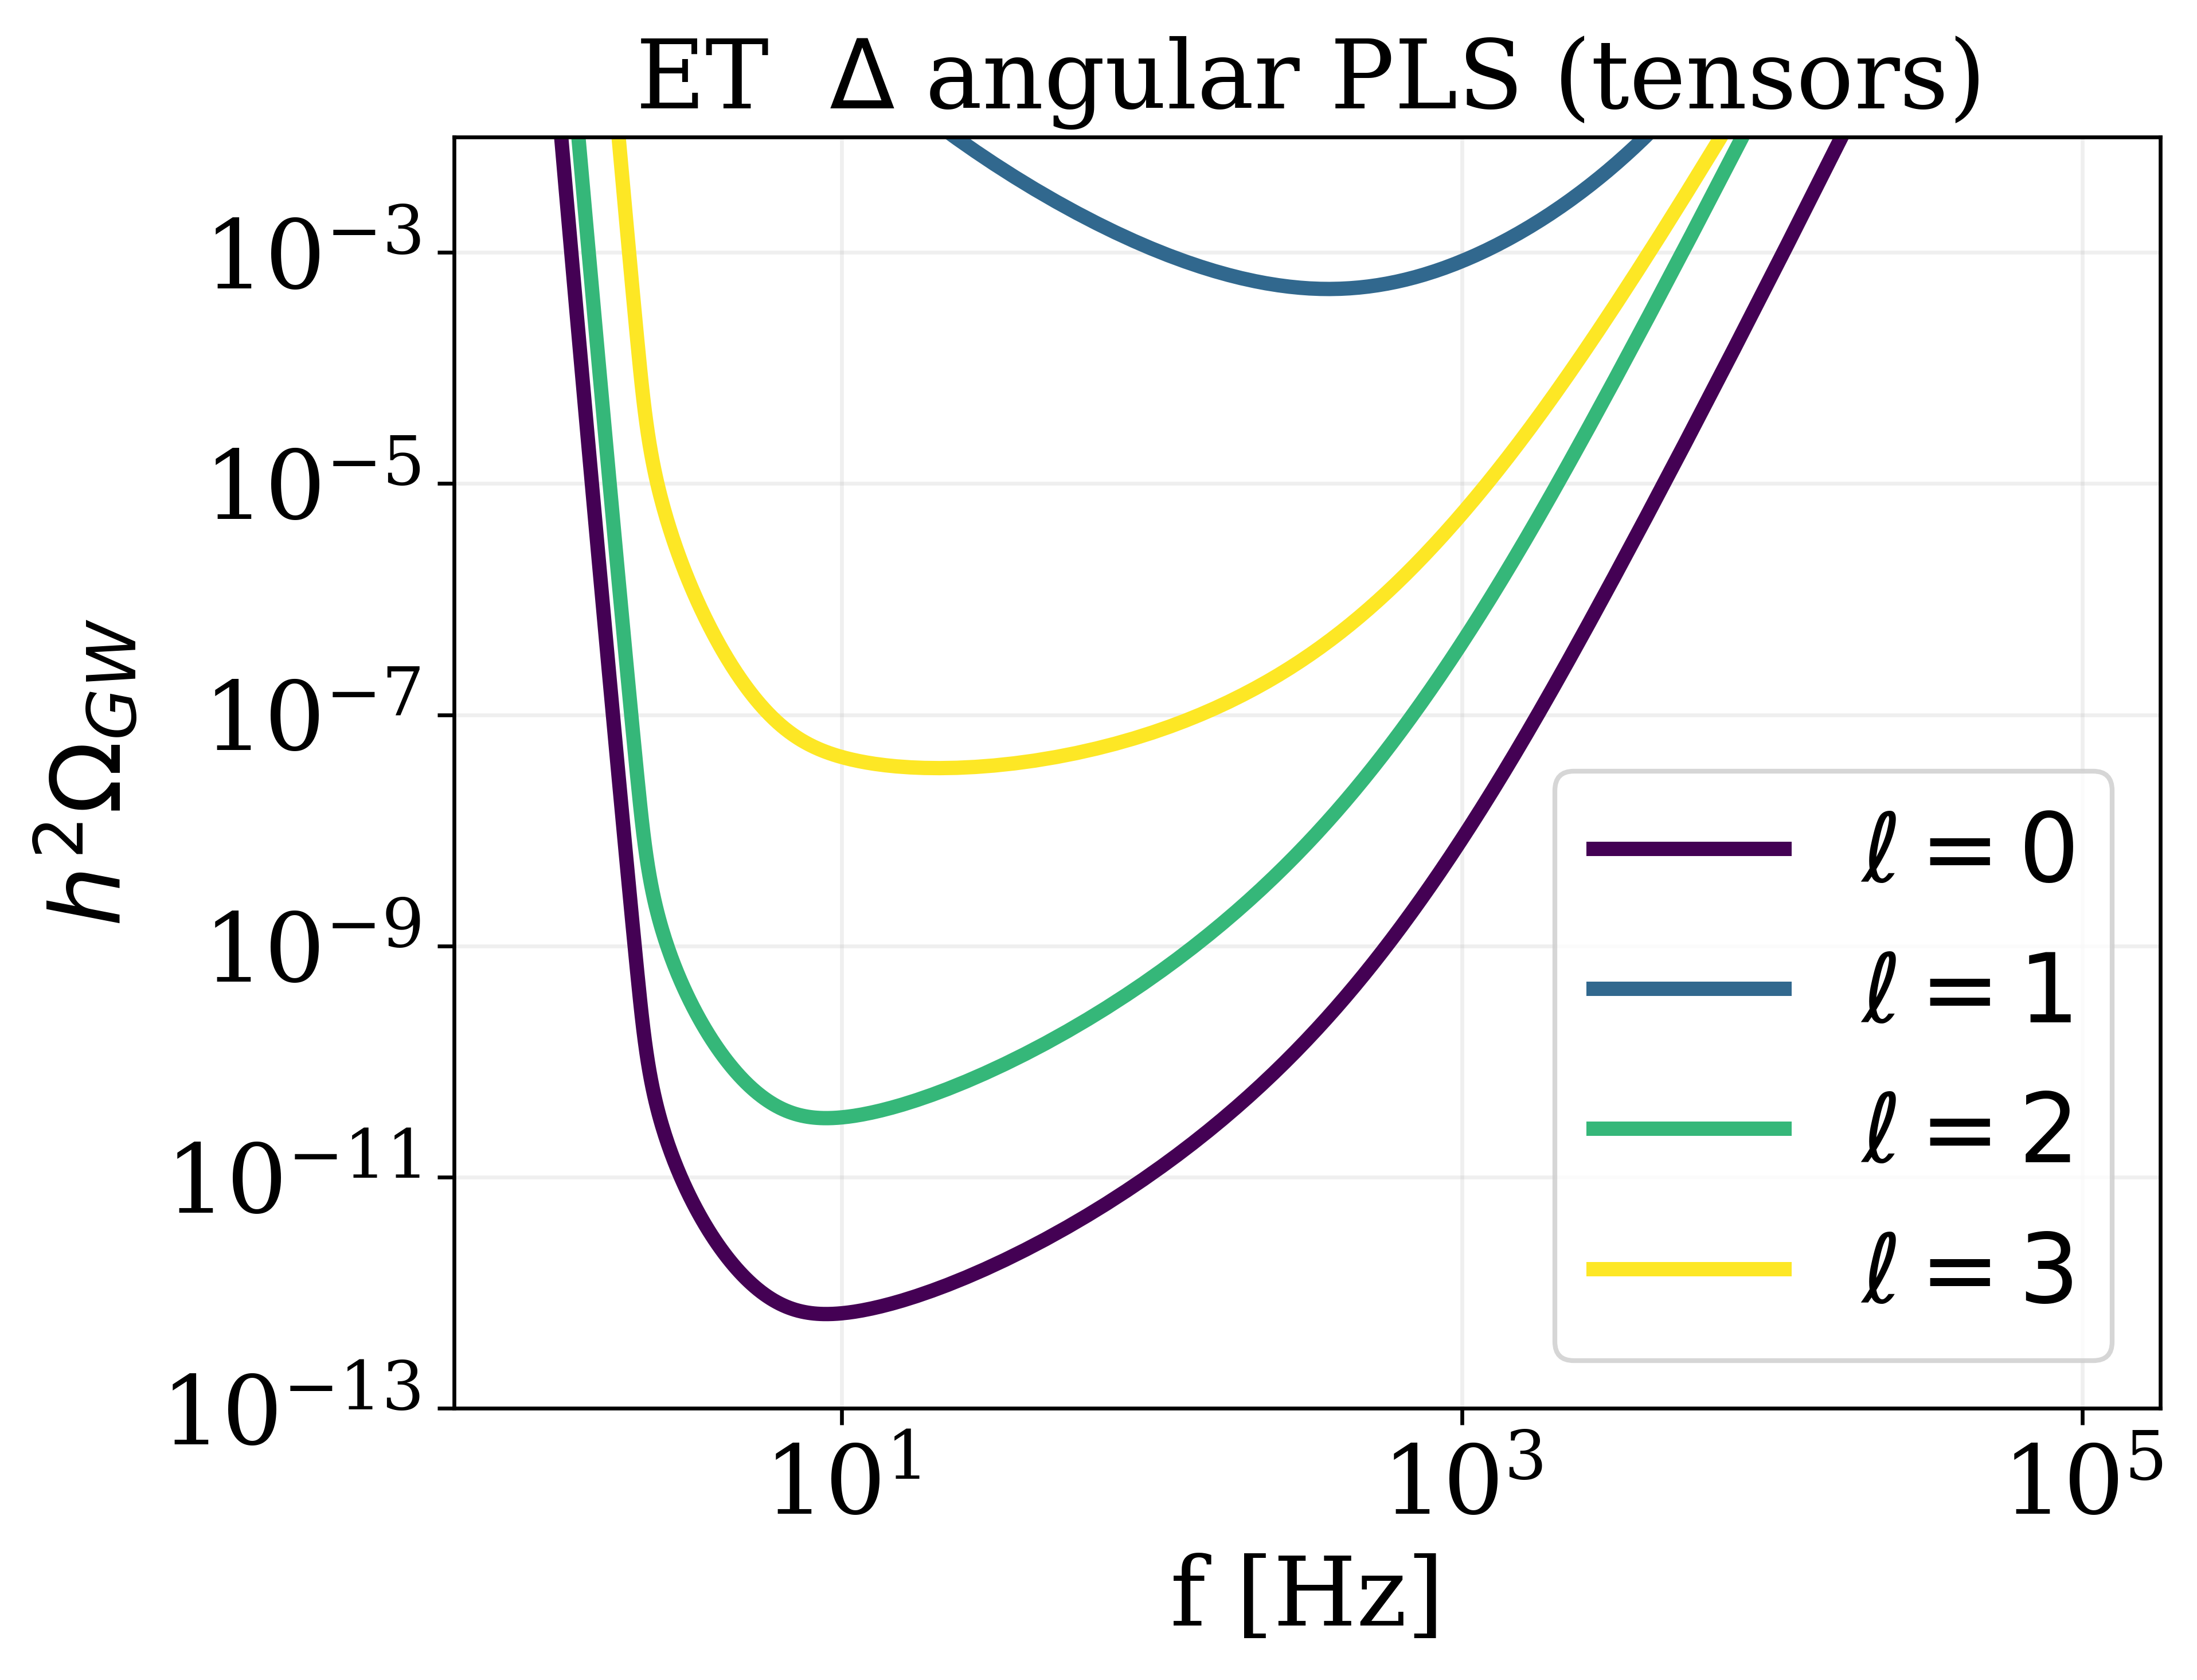

In [12]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_t, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_t, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_t, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_t, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ angular PLS (tensors)')
plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

In [13]:
# vector modes

pls0_v = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 0, f, 'v', 0, fref, snr, Tobs, 1)
pls1_v = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 1, f, 'v', 0, fref, snr, Tobs,  1e-3)
pls2_v = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 2, f, 'v', 0, fref, snr, Tobs,  1e-3)
pls3_v = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 3, f, 'v', 0,fref, snr, Tobs,  1e-3)


print(np.min(pls0_v))
print(np.min(pls1_v))
print(np.min(pls2_v))
print(np.min(pls3_v))

6.538779304675458e-13
0.0003015363909664616
6.473063995779749e-11
2.4182487117654485e-08


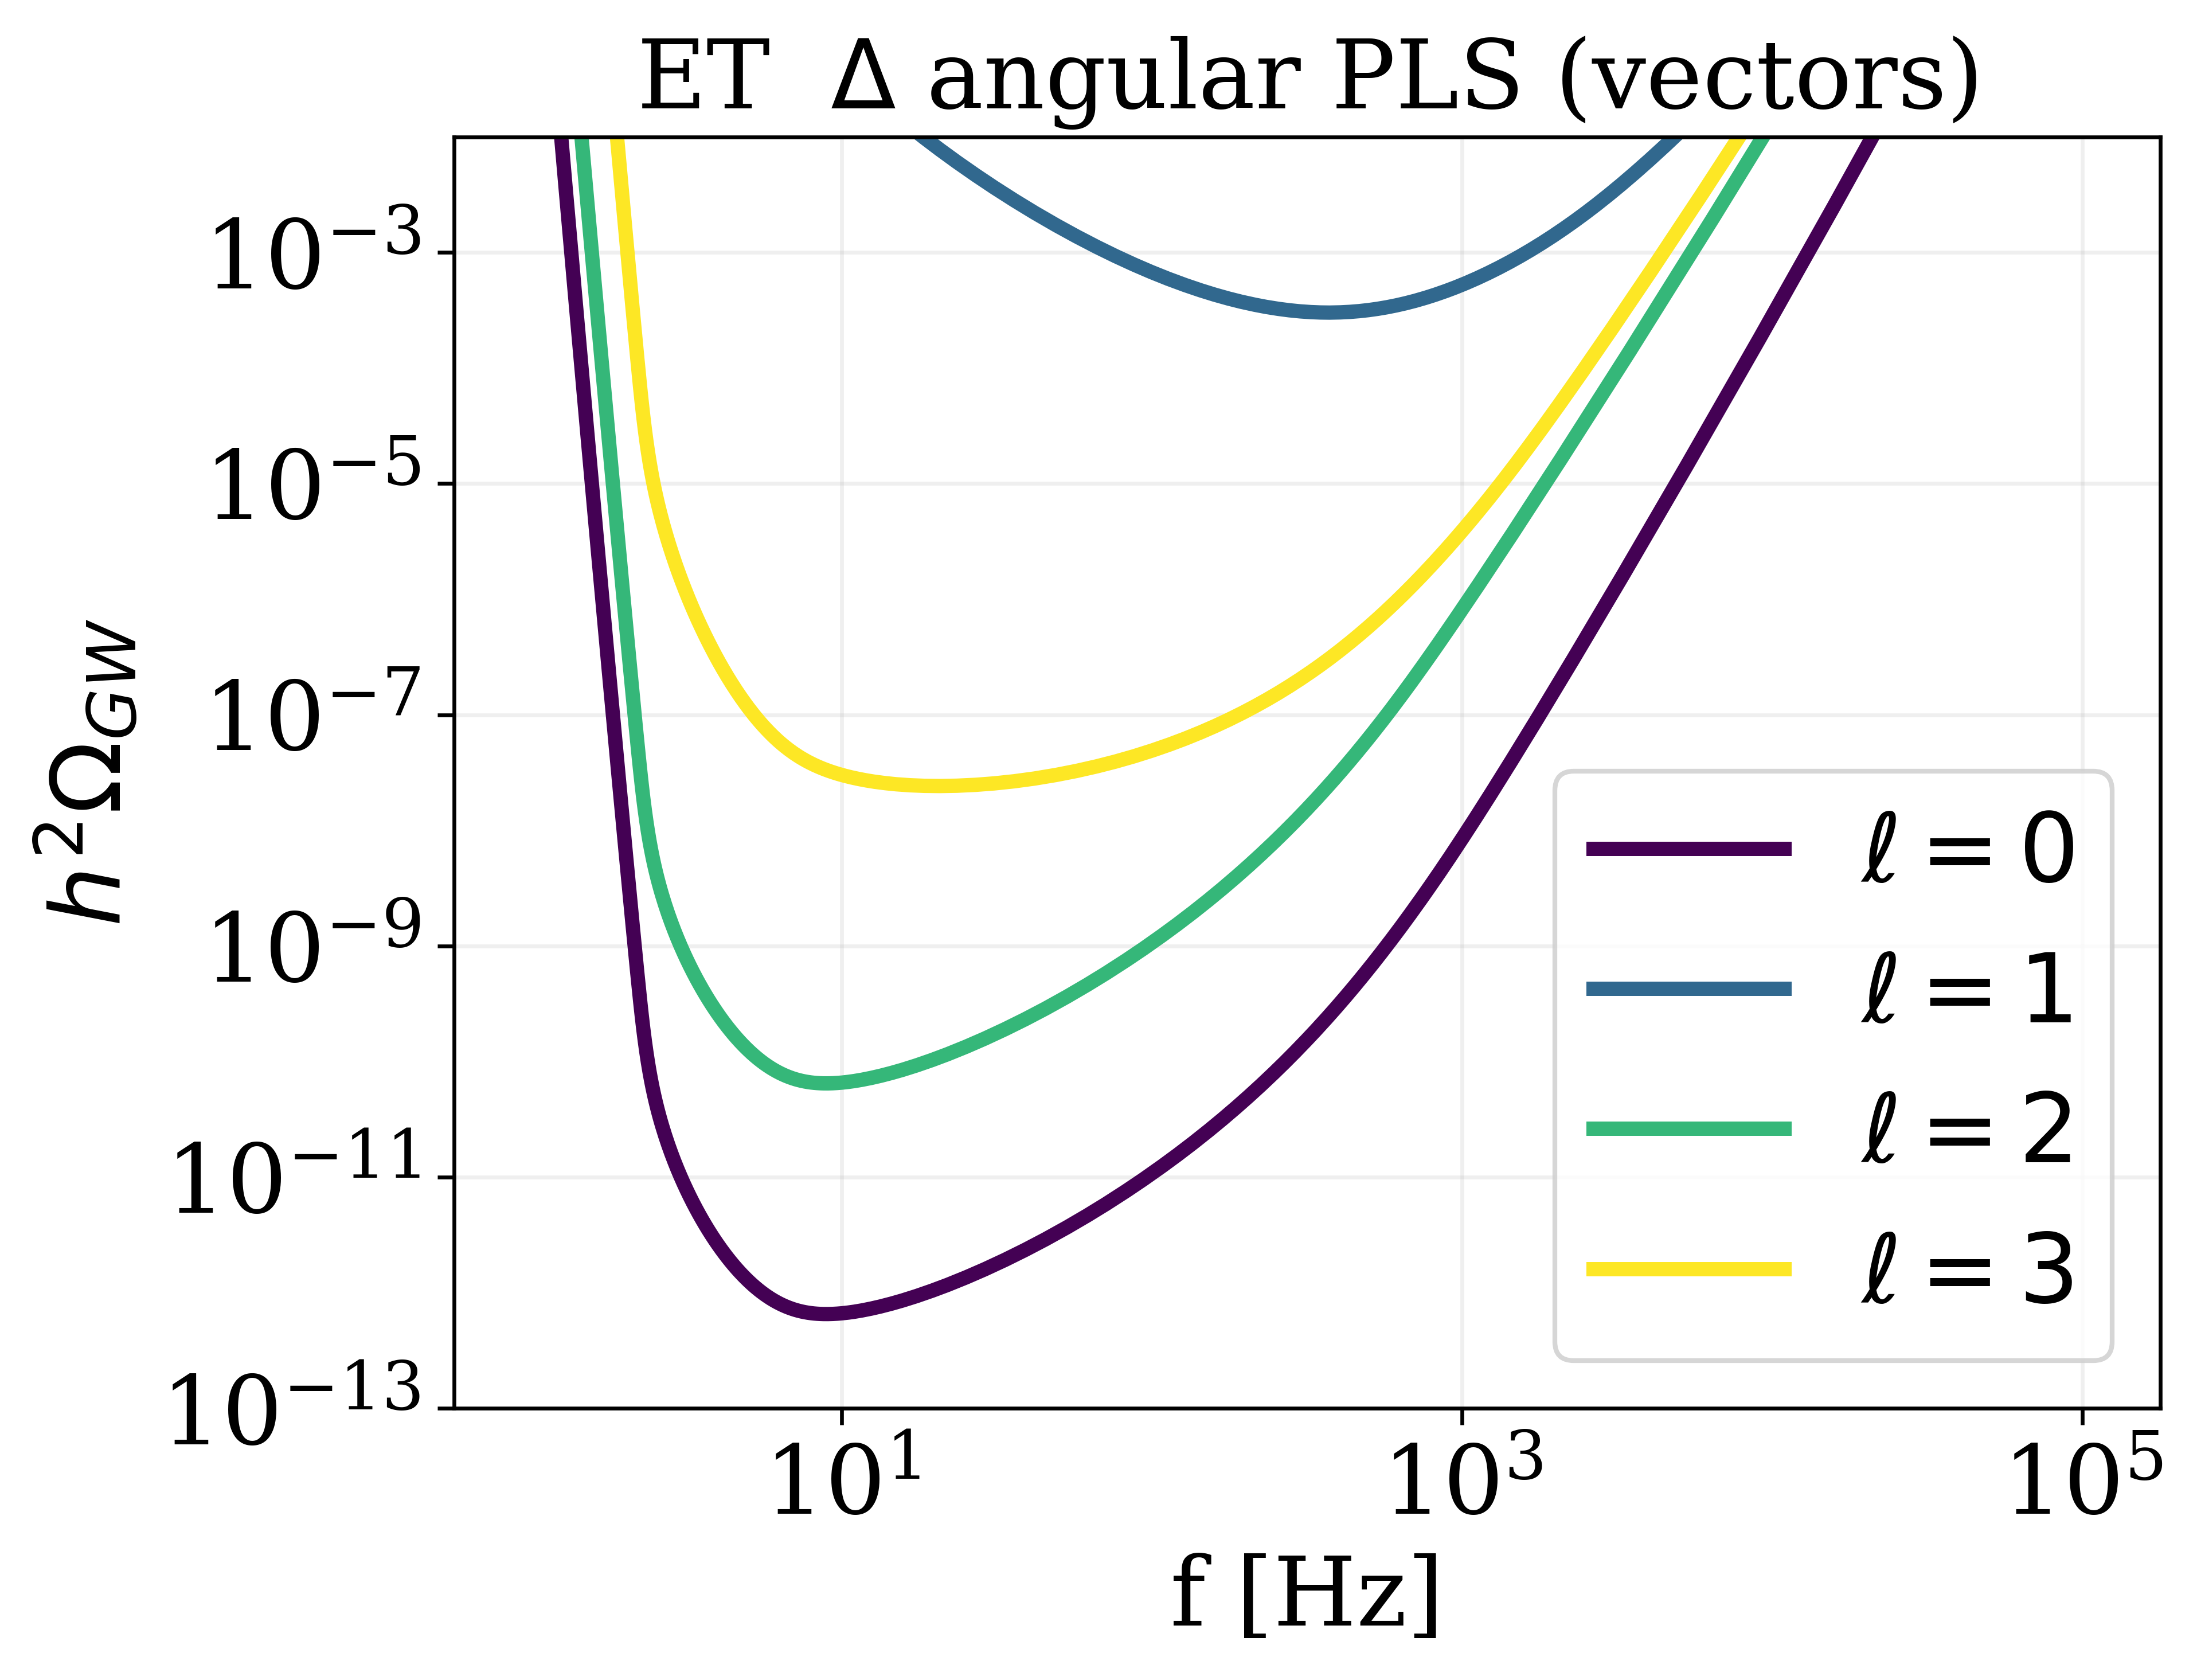

In [14]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_v, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_v, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_v, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_v, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ angular PLS (vectors)')
plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

In [16]:
# scalar modes

pls0_s = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 0, f, 's', 0, fref, snr, Tobs, 1)
pls1_s = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 1, f, 's', 0, fref, snr, Tobs,  1e-3)
pls2_s = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 2, f, 's', 0, fref, snr, Tobs,  1e-3)
pls3_s = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 3, f, 's', 0, fref, snr, Tobs,  1e-3)

print(np.min(pls0_s))
print(np.min(pls1_s))
print(np.min(pls2_s))
print(np.min(pls3_s))

6.538768130830407e-13
0.0002681945810566743
3.236528172232869e-11
5.757673343326662e-09


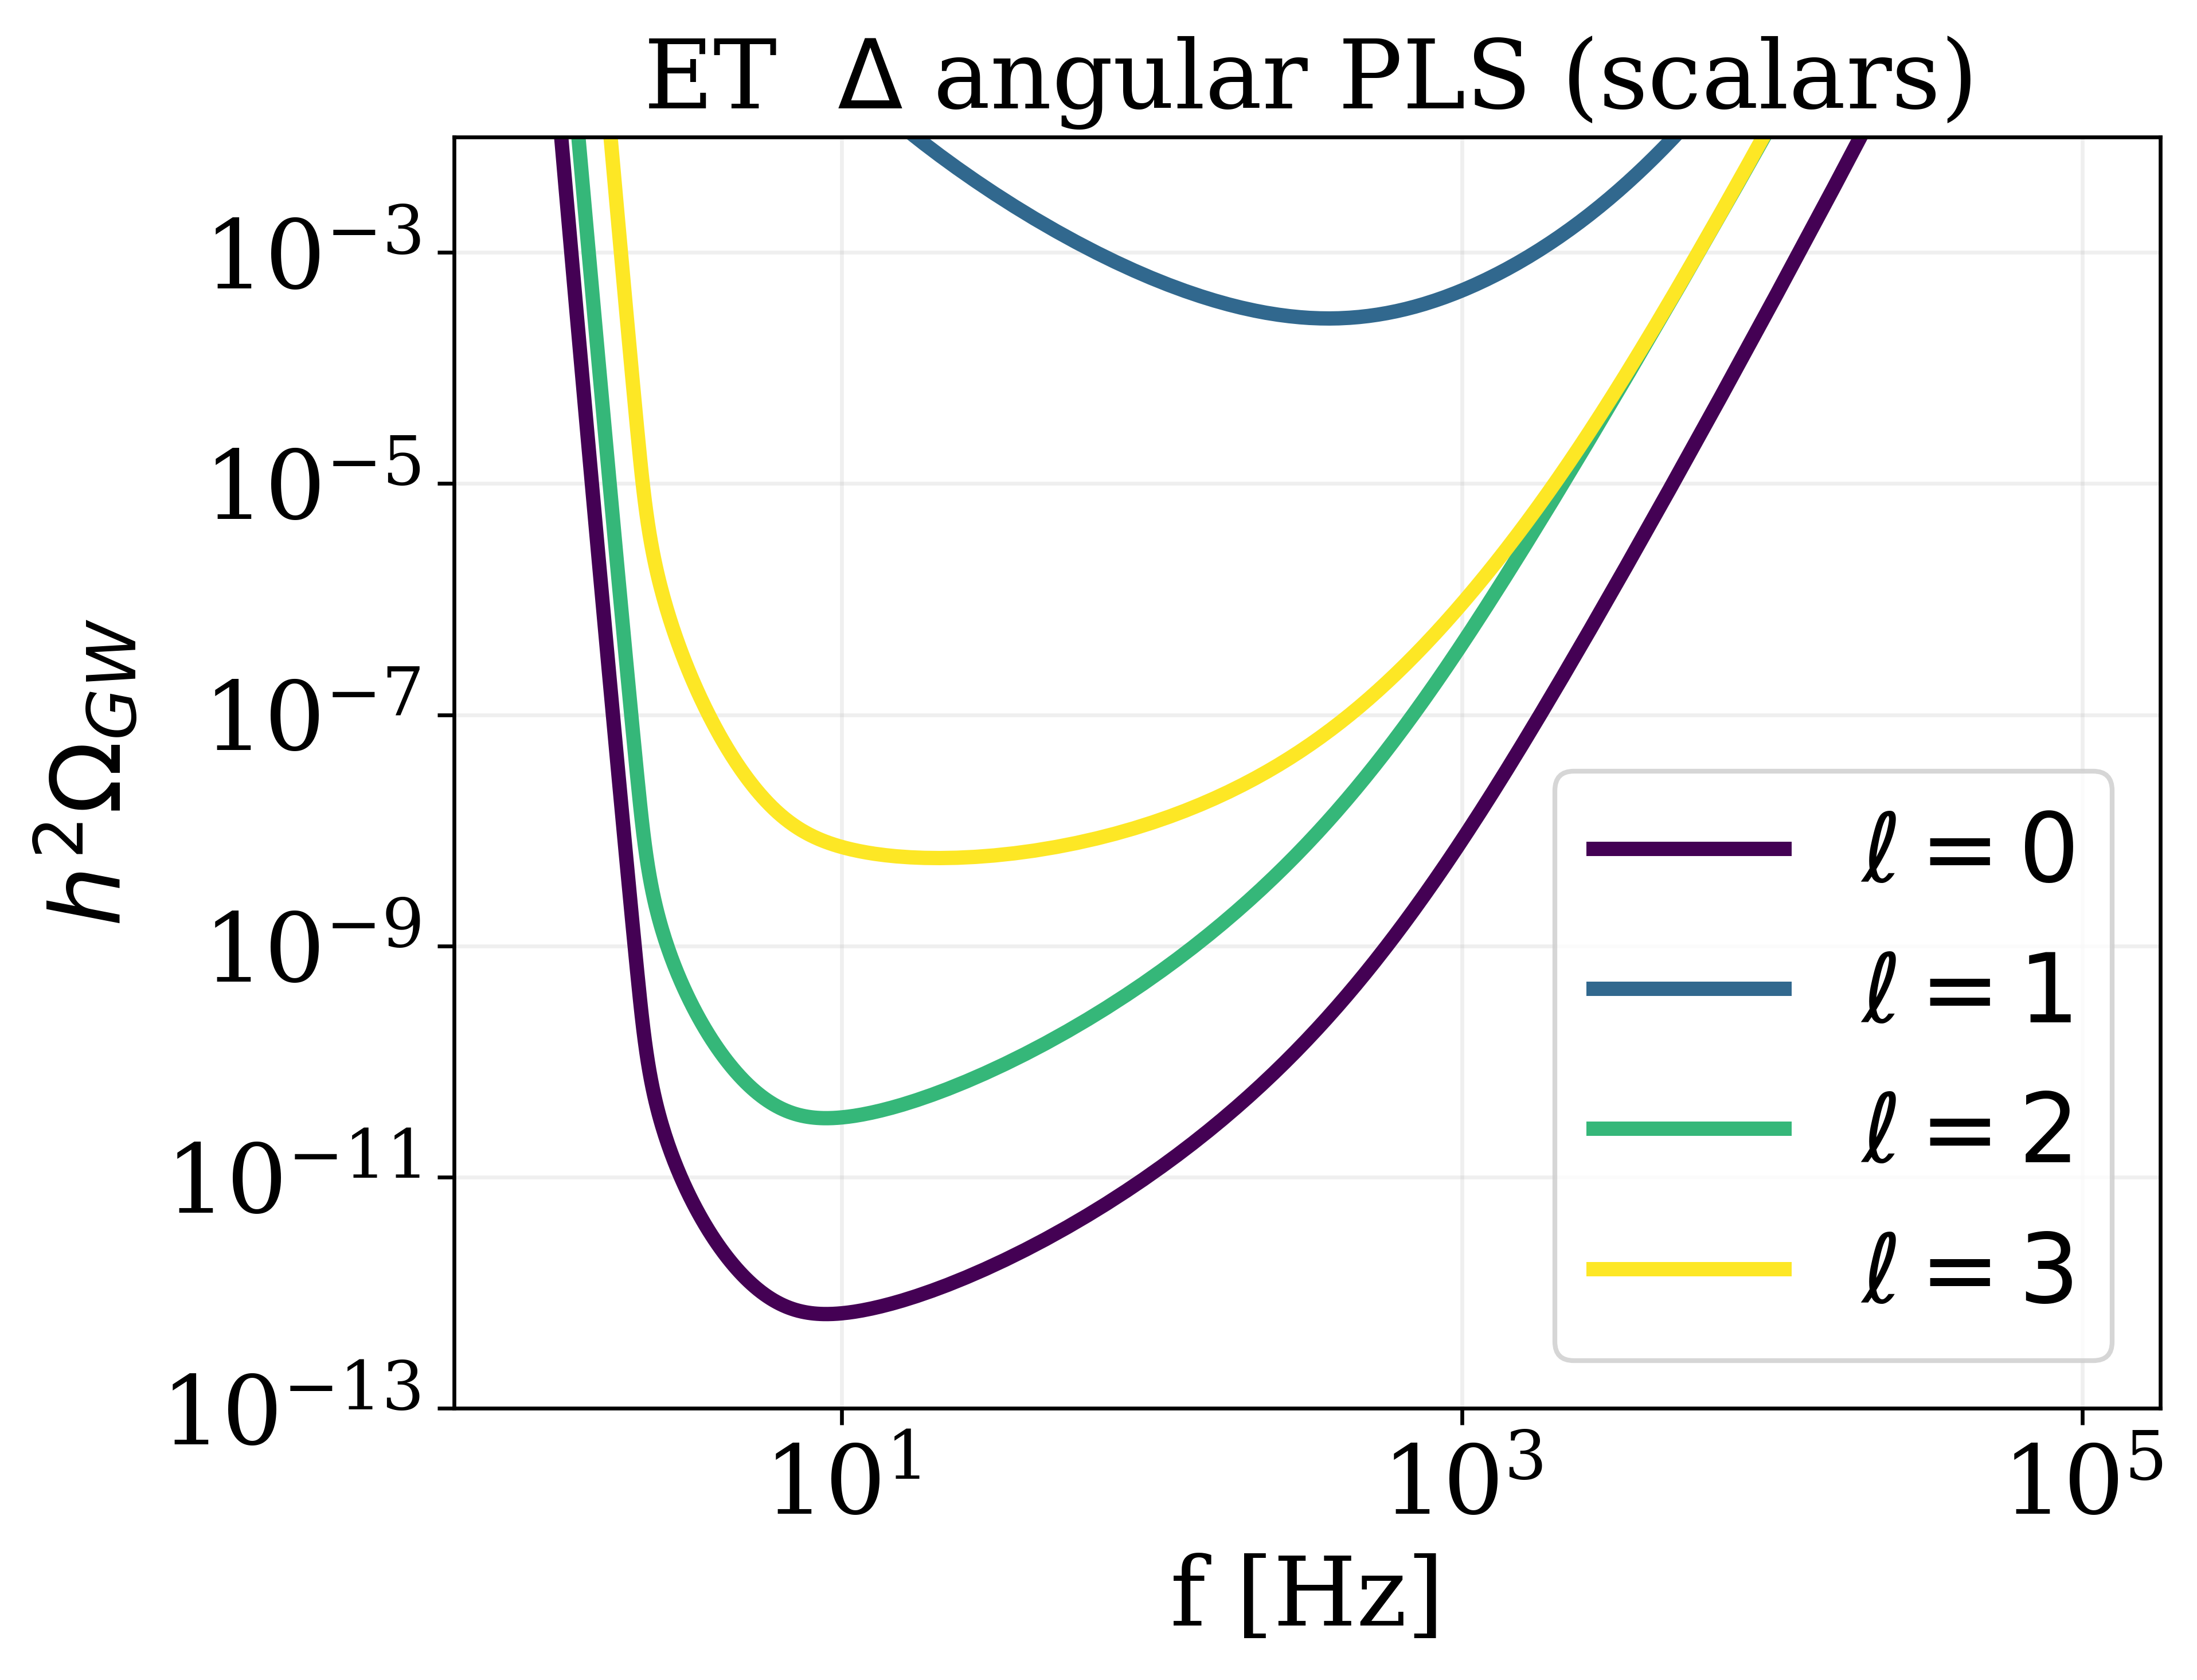

In [17]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_s, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_s, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_s, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_s, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ angular PLS (scalars)')
plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

In [7]:
pls0_V = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 0, f, 'V', 0, fref, snr, Tobs, 1)
pls1_V = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 1, f, 'V', 0, fref, snr, Tobs,  1e-3)
pls2_V = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 2, f, 'V', 0, fref, snr, Tobs,  1e-3)
pls3_V = Sensitivity_ell.PLS_ell('ET X', 'ET Y', 3, f, 'V', 0, fref, snr, Tobs,  1e-3)


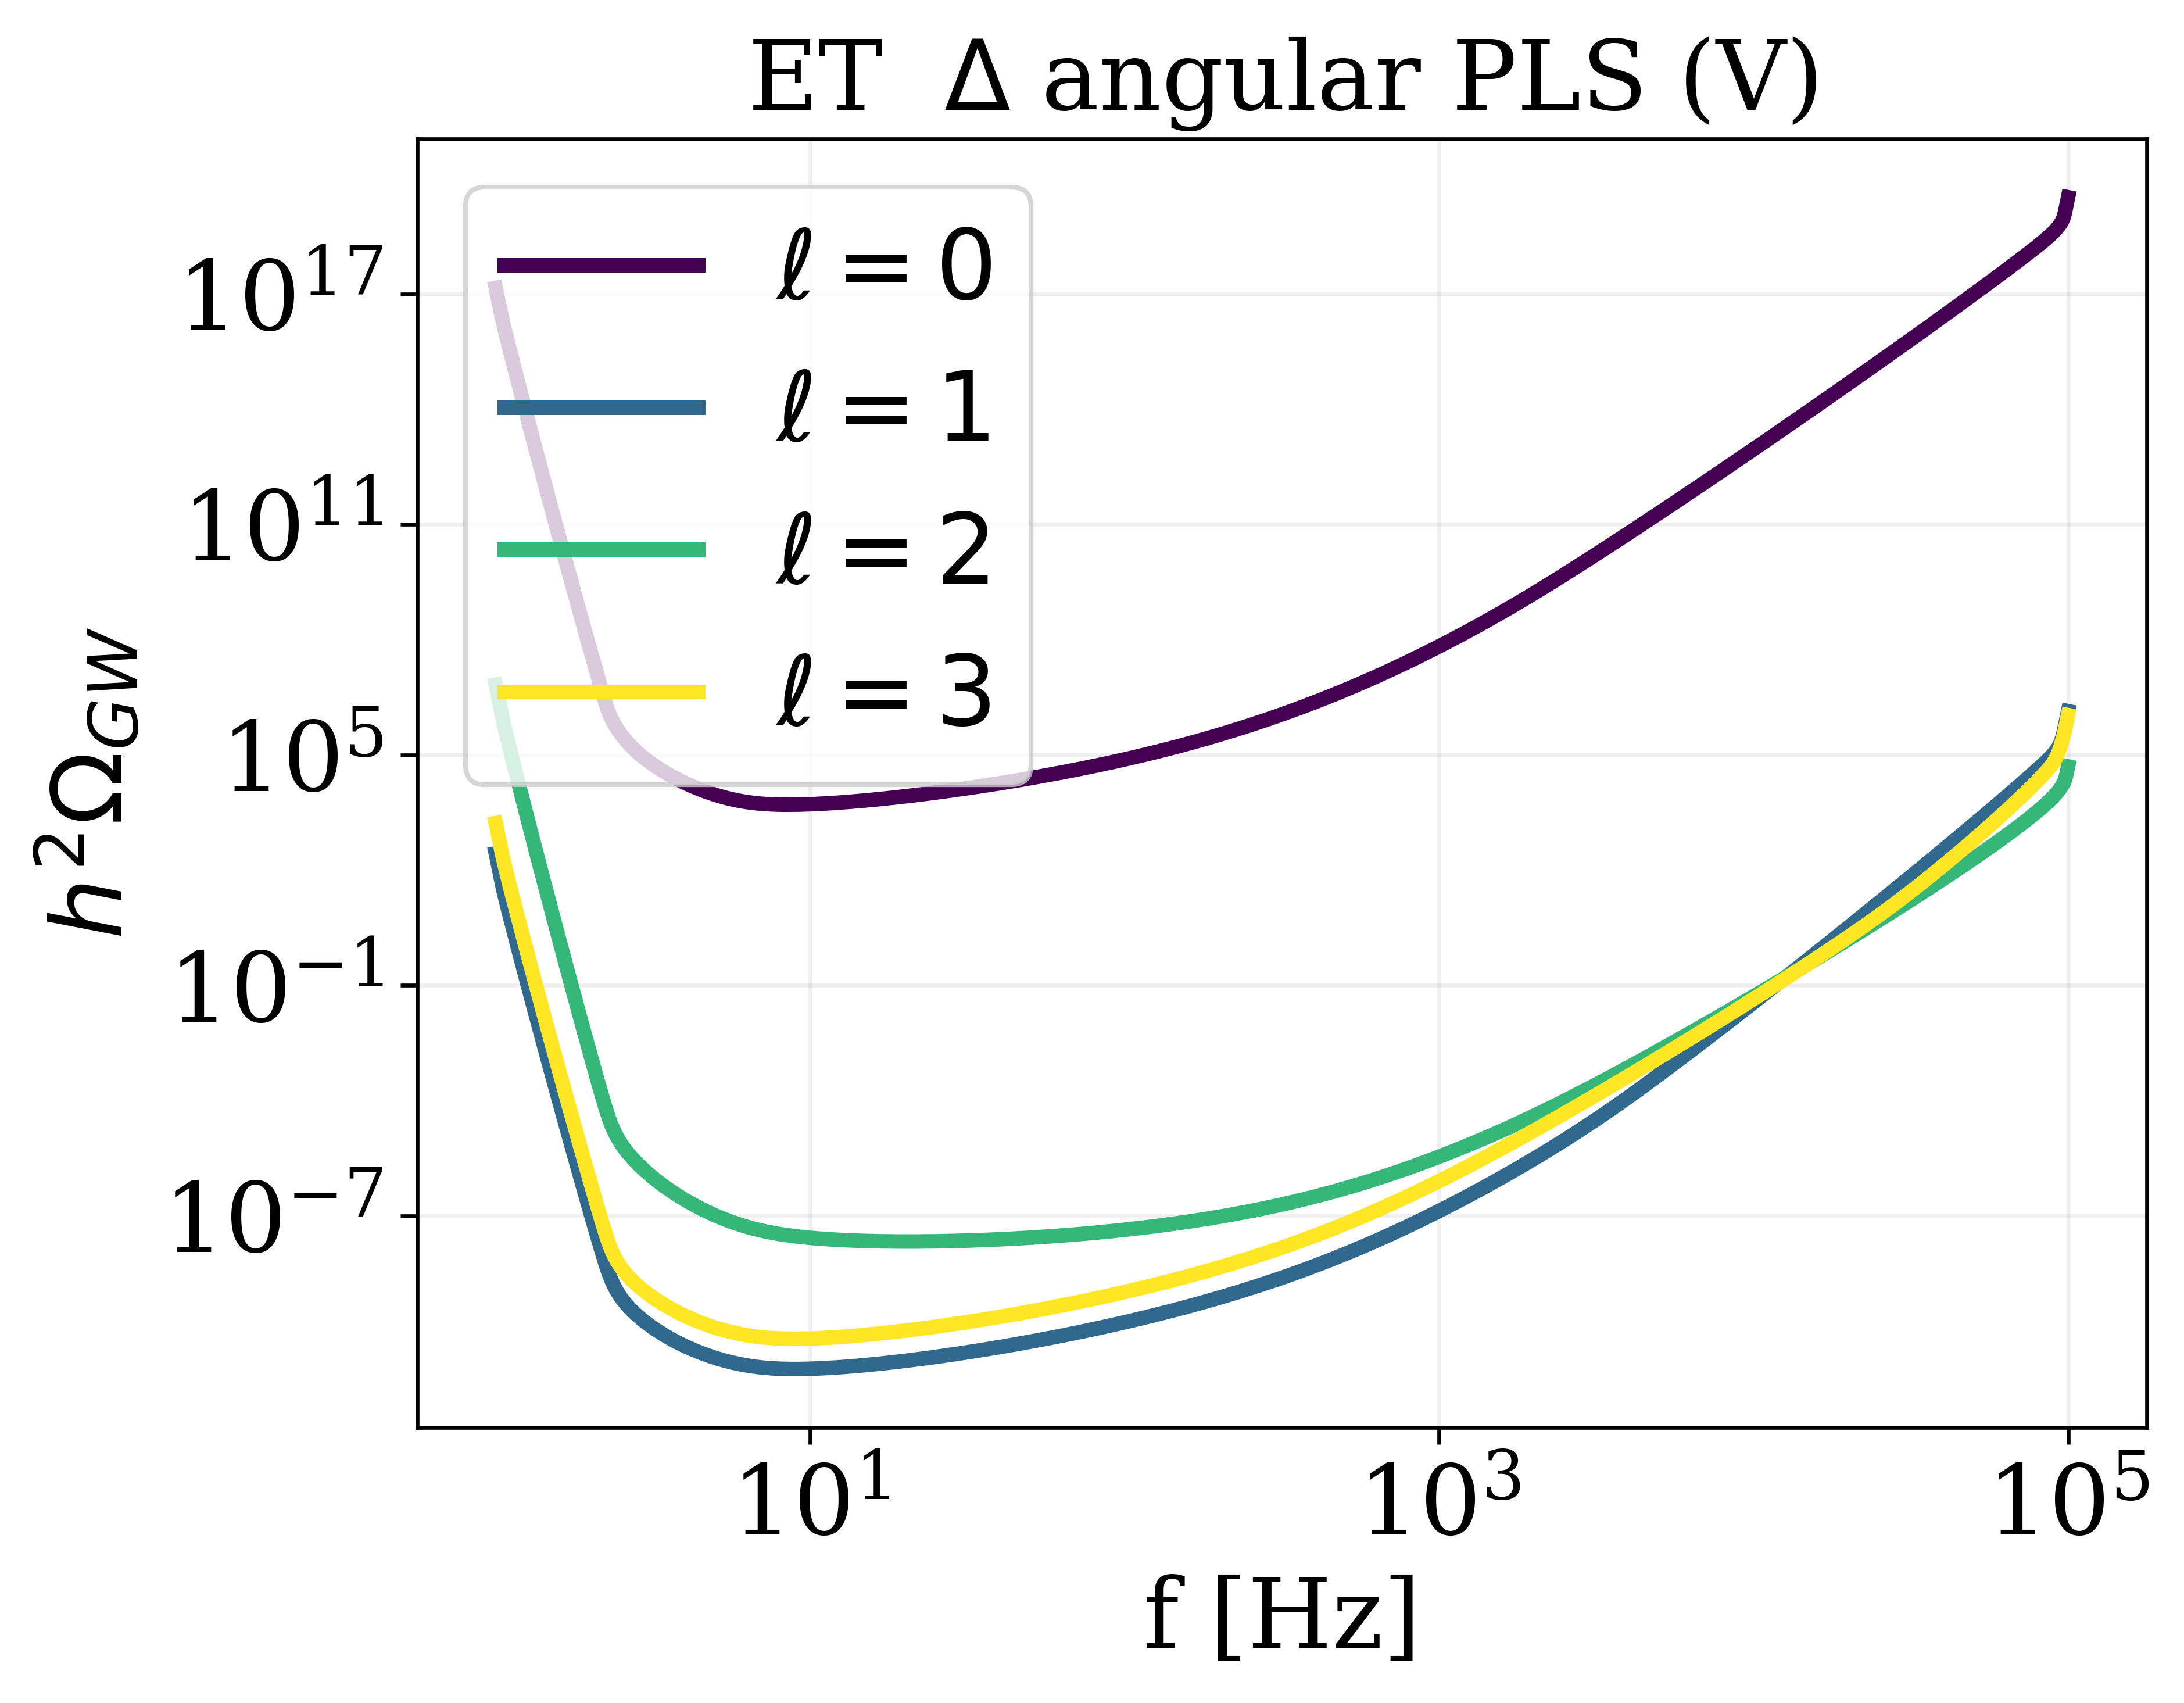

In [9]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_V, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_V, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_V, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_V, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ angular PLS (V)')
#plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

* ET $\Delta$ + CE sensitivity to X polarization modes

In [19]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_tv_etCE = pls.PLS_2pol('ET X', 'ET Y', 'CE', f, fref, 'v', snr, Tobs, 0, None)
pls_ts_etCE = pls.PLS_2pol('ET X', 'ET Y', 'CE', f, fref, 's', snr, Tobs, 0, None)

In [20]:
print(np.min(pls_tv_etCE))
print(np.min(pls_ts_etCE))

4.56330764367743e-12
3.2171701450656926e-12


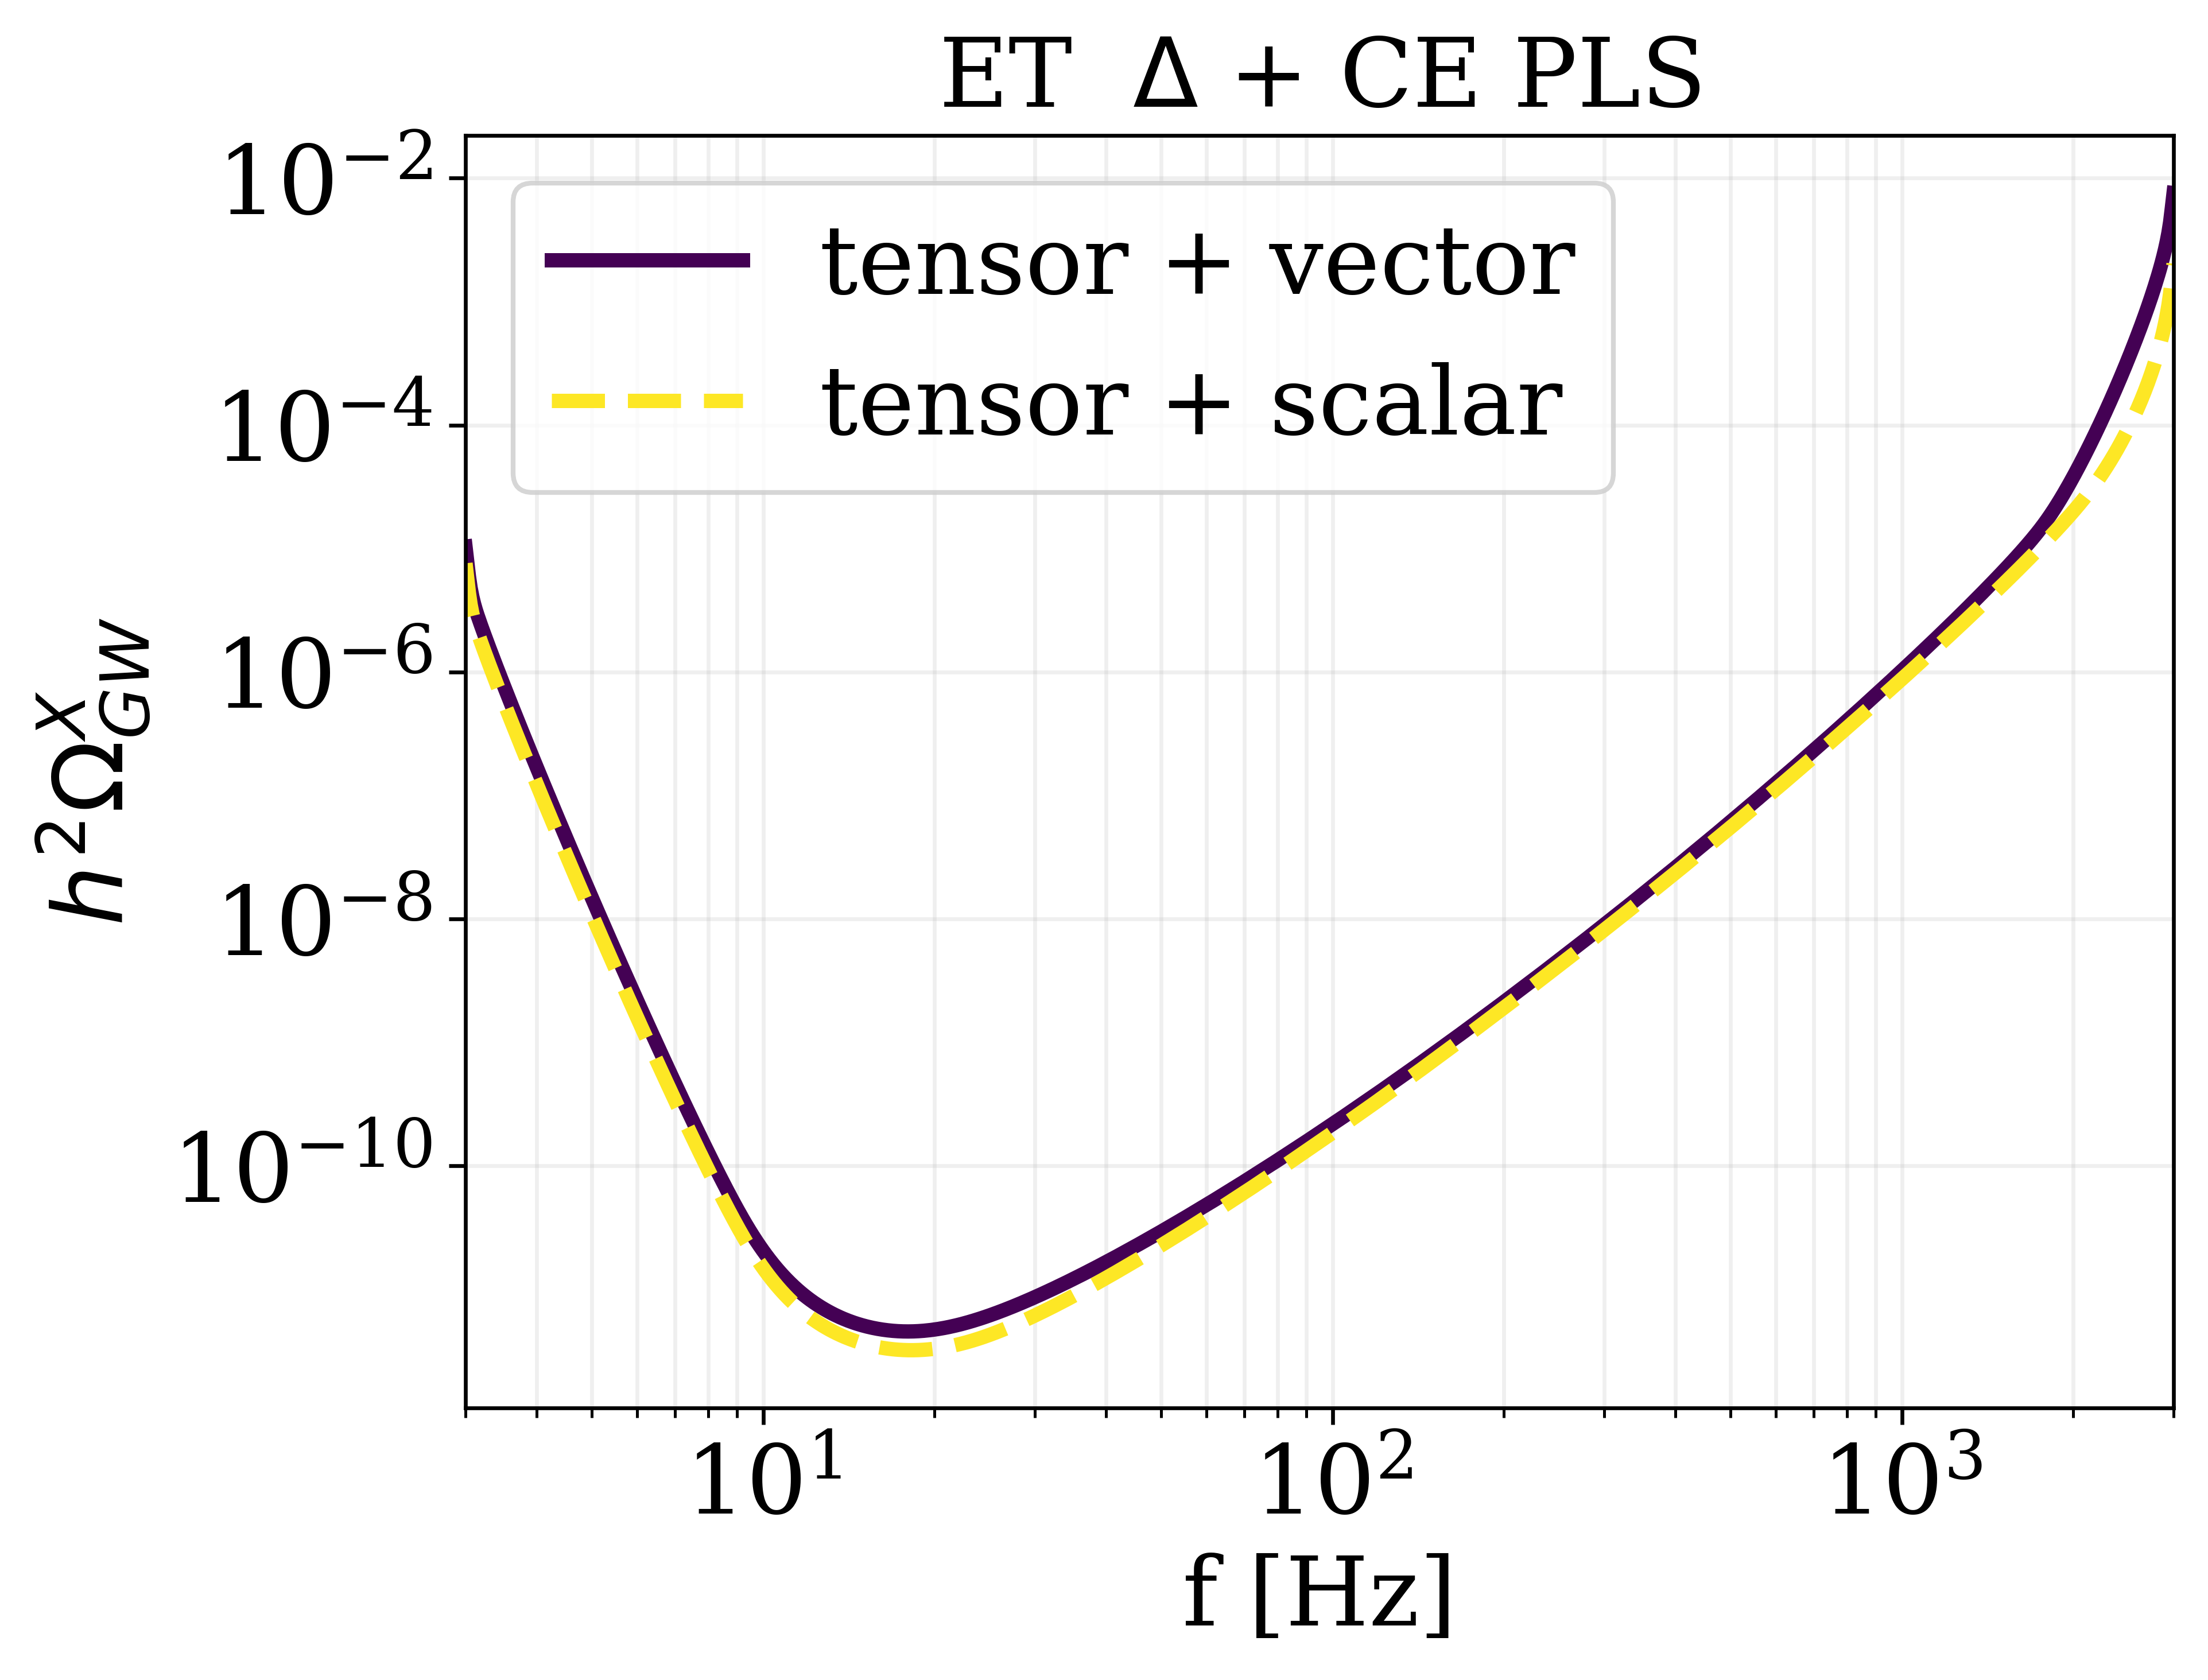

In [21]:
colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_etCE, label='tensor + vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_etCE, label='tensor + scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}^X$')
plt.xlim(3, 3e3)
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [22]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_t_etCE = pls.PLS_3pol('ET X', 'ET Y', 'CE', f, fref, 't', snr, Tobs, 0, None)
pls_v_etCE = pls.PLS_3pol('ET X', 'ET Y', 'CE', f, fref, 'v', snr, Tobs, 0, None)
pls_s_etCE = pls.PLS_3pol('ET X', 'ET Y', 'CE', f, fref, 's', snr, Tobs, 0, None)

In [23]:
# find minimum

min_PLS_t = np.min(pls_t_etCE)  
print('min PLS t', min_PLS_t)

min_PLS_v = np.min(pls_v_etCE)
print('min PLS v', min_PLS_v)

min_PLS_s = np.min(pls_s_etCE)
print('min PLS s', min_PLS_s)

min PLS t 4.411588564149796e-11
min PLS v 1.9636549983227944e-10
min PLS s 1.3800667435481652e-10


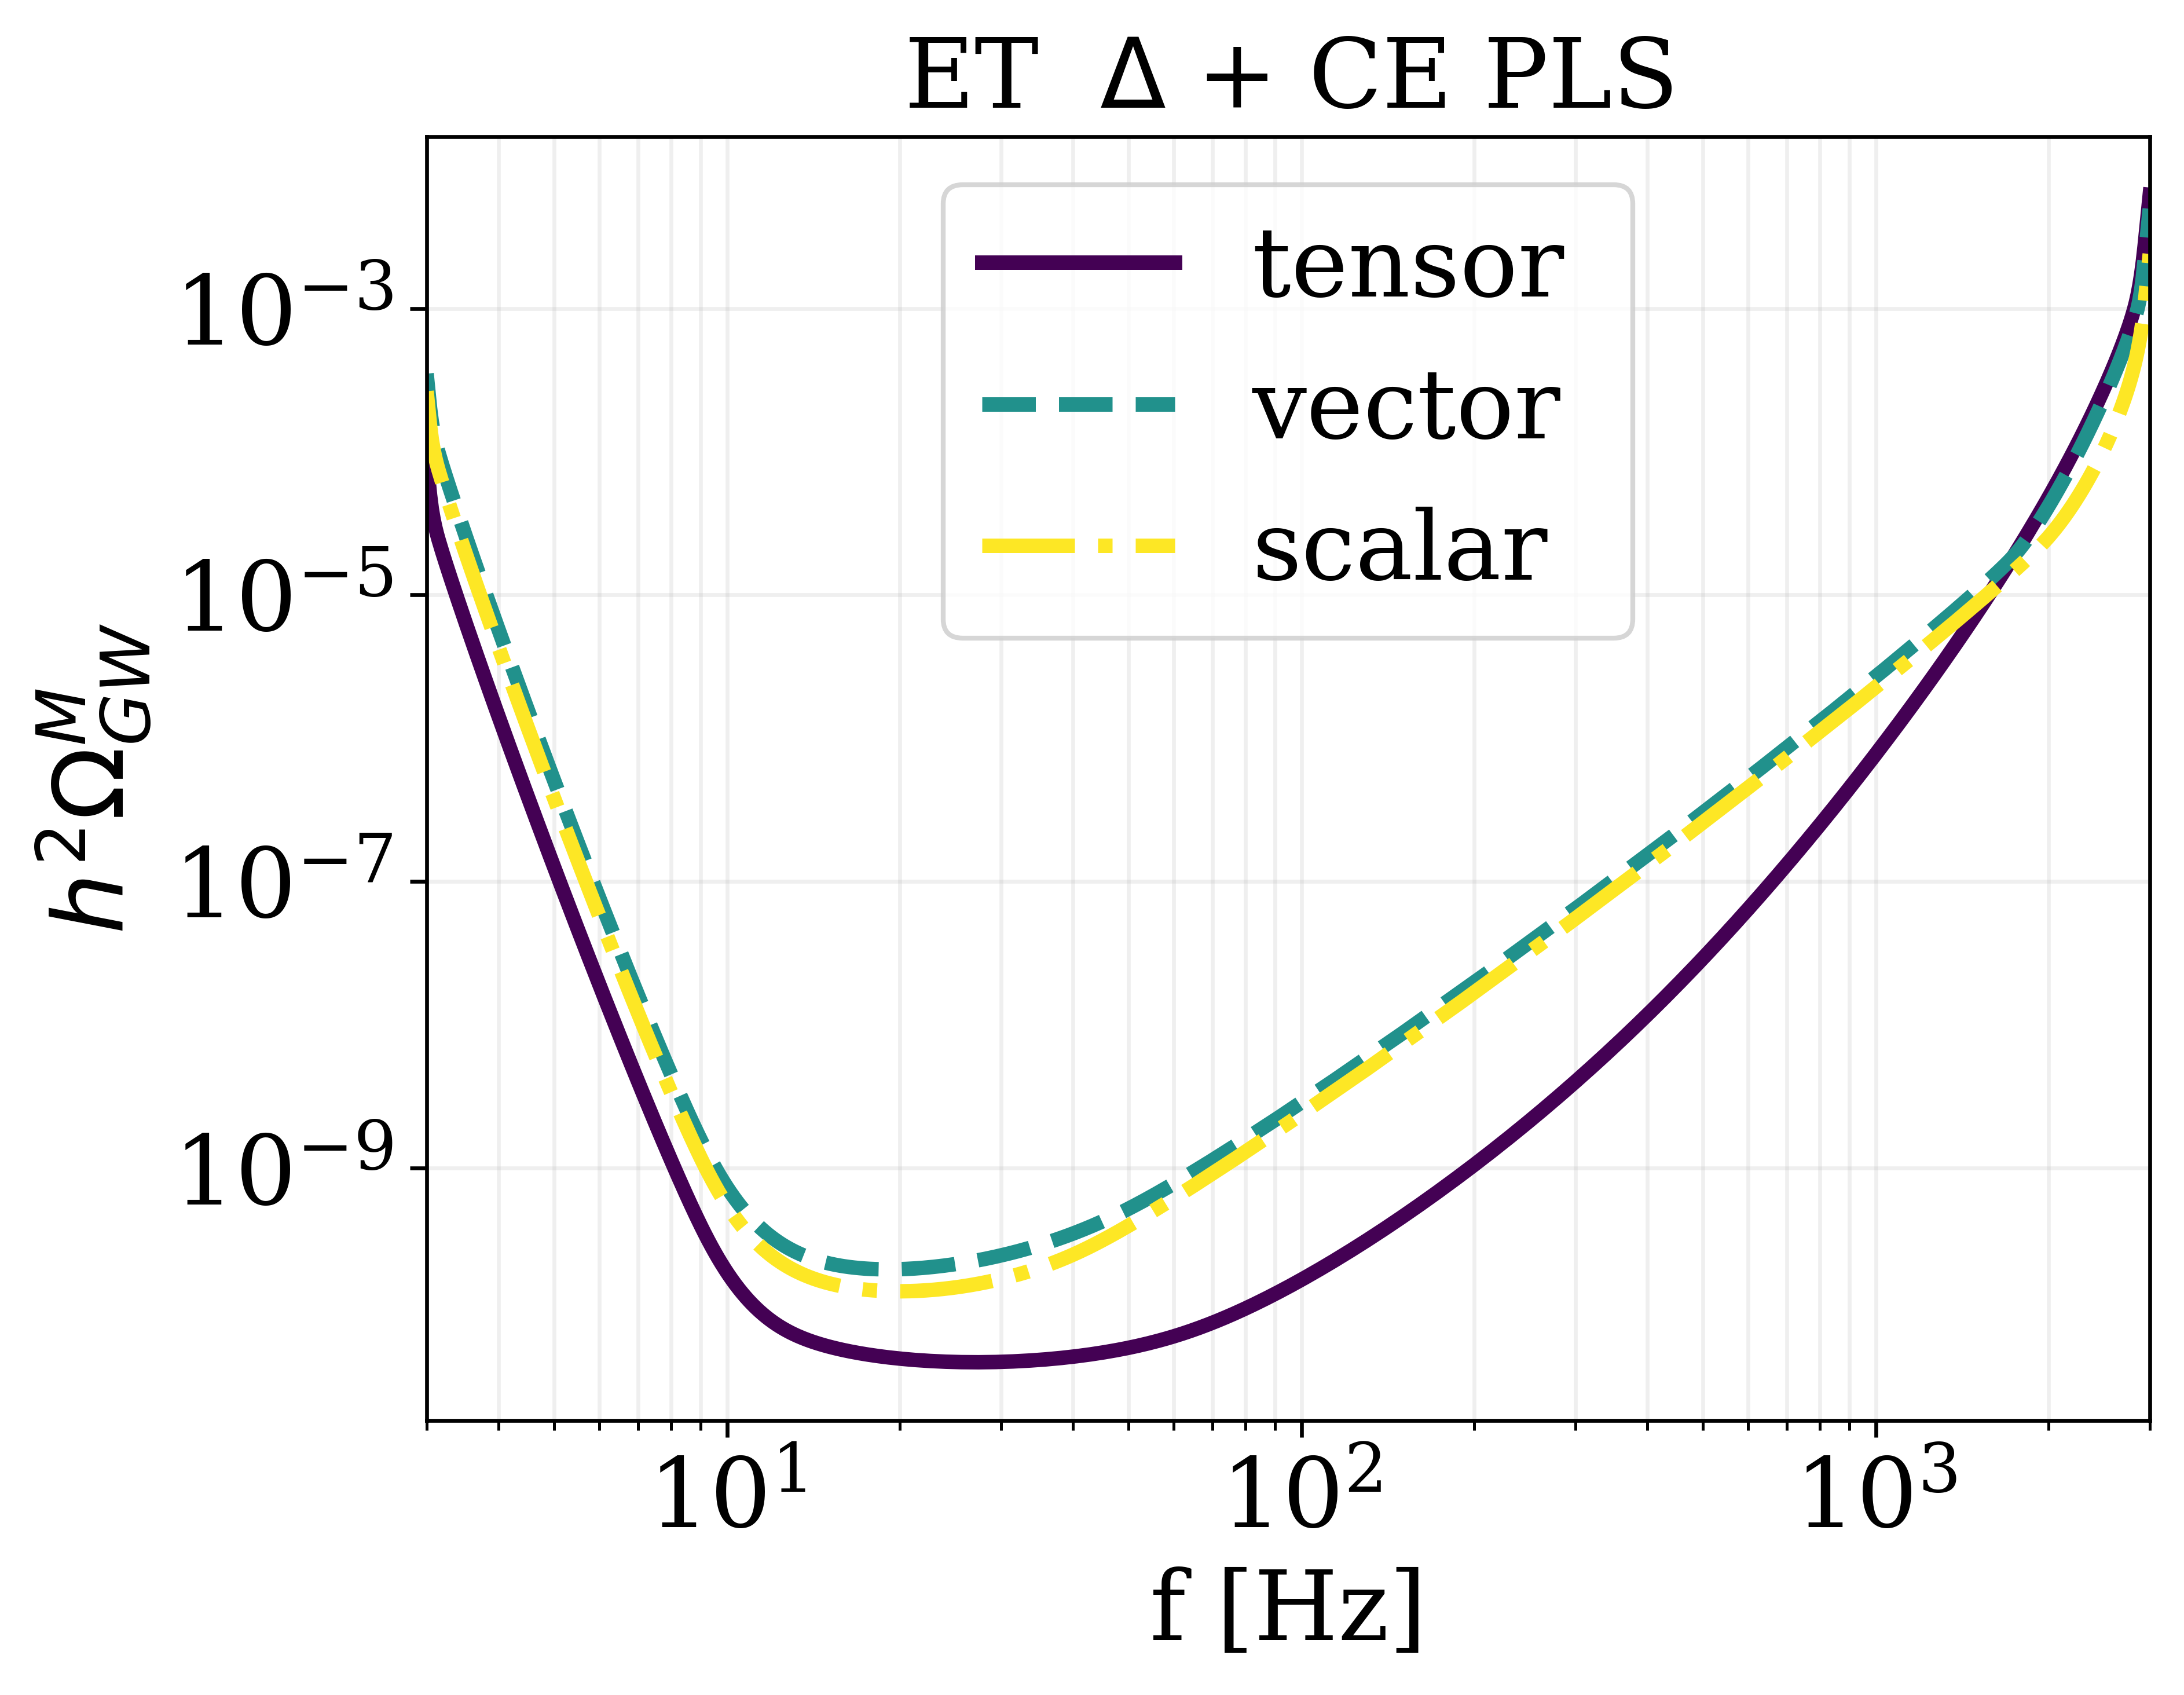

In [24]:
colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_etCE, label='tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_etCE, label='vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_etCE, label='scalar', linestyle='-.', color=colors[2], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}^M$')
plt.xlim(3, 3e3)
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()